In [4]:
from pprint import pprint
import data_reader
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

In [2]:
path2submits  = 'iui20_ideaSubmitsPart2.csv'
path2requests = 'iui20_inspirationRequestsPart2.csv'
seconds_per_bucket = 15
train_percentage = 0.7

In [5]:
#load data as sessions
sessions = data_reader.load_data_as_sessions_dict(path2submits, path2requests, seconds_per_bucket)
# calculate avoiders and seekers
sessions = data_reader.add_avoiders_undetermined_and_seekers(sessions)
# create train and test set of worker ids
train_worker_ids, test_worker_ids = data_reader.split_worker_ids_into_train_test(sessions, train_percentage=train_percentage)
print(len(sessions))

41


[array([[0, 6],
       [3, 4]]),
 array([[5, 1],
       [5, 2]]),
 array([[5, 1],
       [3, 4]]),
 array([[6, 0],
       [4, 3]]),
 array([[6, 0],
       [4, 3]]),
 array([[6, 0],
       [4, 3]]),
 array([[6, 0],
       [3, 4]]),
 array([[6, 0],
       [4, 3]]),
 array([[6, 0],
       [3, 4]]),
 array([[6, 0],
       [3, 4]]),
 array([[6, 0],
       [3, 4]]),
 array([[6, 0],
       [2, 5]]),
 array([[6, 0],
       [2, 5]]),
 array([[6, 0],
       [2, 5]]),
 array([[6, 0],
       [2, 5]])]


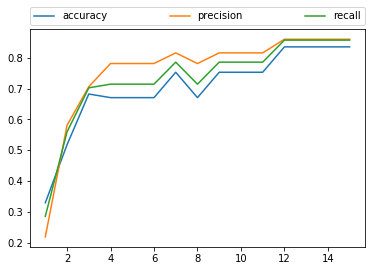

In [4]:
# iterate through different numbers of buckets
# train a classifier for each different numbers of buckets
# test on test examples
# get roc curve
conf_matrices    = []
accuracies       = []
precisions_micro = []
recalls_micro    = []
max_number_of_buckets = 60
for nr_of_buckets in range(1, max_number_of_buckets, int(60/seconds_per_bucket)):
    x_tr, y_tr, x_te, y_te = data_reader.create_train_test_dataset(nr_of_buckets, train_worker_ids, test_worker_ids, sessions, train_percentage)
    #clf = DecisionTreeClassifier()
    clf = RandomForestClassifier(200, class_weight='balanced')
    clf.fit(x_tr, y_tr)
    y_pre = clf.predict(x_te)
   
    sample_weight = 1.0 * np.bincount(y_te) / len(y_te)
    sample_weight = [sample_weight[y_te[i]] for i in range(len(y_te))]
    
    conf_matrices   .append(confusion_matrix(y_te, y_pre))
    accuracies      .append(accuracy_score  (y_te, y_pre, sample_weight=sample_weight))
    precisions_micro.append(precision_score (y_te, y_pre, average='macro', sample_weight=sample_weight))
    recalls_micro   .append(recall_score    (y_te, y_pre, average='macro', sample_weight=sample_weight))

# [[tn, fp, fn, tp], ...]
#conf_matrices = np.array([conf_m.ravel() for conf_m in conf_matrices])

#pprint(precisions_micro)
pprint(conf_matrices)

#plt.xticks(range(1, max_number_of_buckets))
steps = int(max_number_of_buckets / int(60/seconds_per_bucket))
plt.plot(range(1, steps+1), accuracies,       label='accuracy')
plt.plot(range(1, steps+1), precisions_micro, label='precision')
plt.plot(range(1, steps+1), recalls_micro,    label='recall')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=3, mode="expand", borderaxespad=0.)
plt.show()

/home/bobby/Env/tensorflow/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


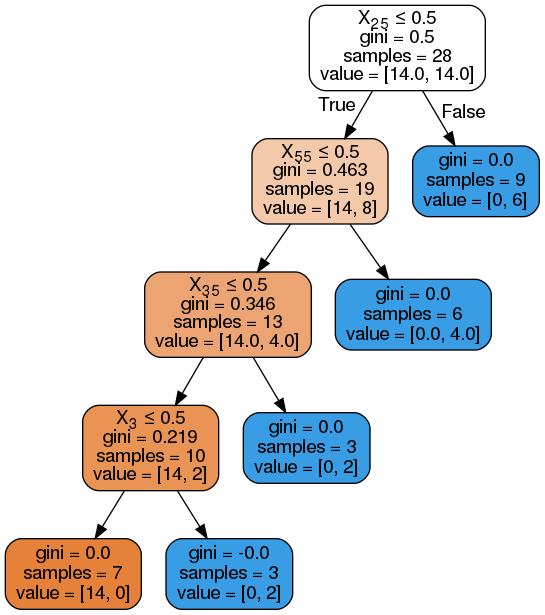

In [5]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

train_percentage = 1.0
nr_of_buckets = 10
x_tr, y_tr, x_te, y_te = data_reader.create_train_test_dataset(max_number_of_buckets, train_worker_ids, test_worker_ids, sessions, train_percentage)
clf = DecisionTreeClassifier(class_weight='balanced')
clf.fit(x_tr, y_tr)
    
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())